In [1]:
from datetime import datetime
import backtrader as bt


<IPython.core.display.Javascript object>


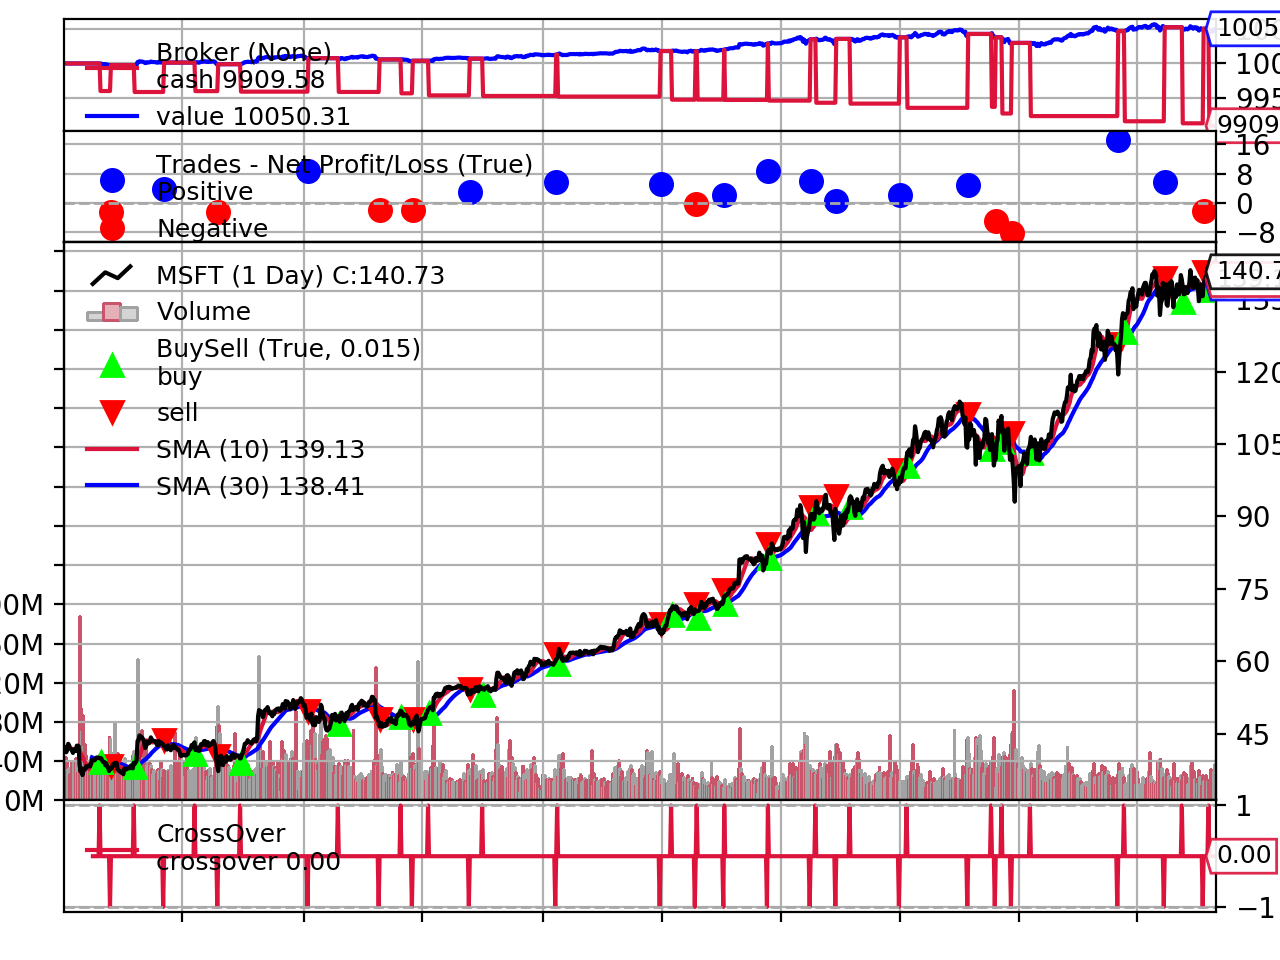

[[<Figure size 640x480 with 5 Axes>]]

In [2]:
%matplotlib notebook
class SmaCross(bt.Strategy):
    params = dict(
        pfast = 10,
        pslow = 30
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)
        sma2 = bt.ind.SMA(period=self.p.pslow)
        self.crossover = bt.ind.CrossOver(sma1, sma2)
        
    def next(self):
        if not self.position:
            if self.crossover > 0:
                self.buy()
        elif self.crossover < 0:
            self.close()
            
cerebro = bt.Cerebro()

data = bt.feeds.YahooFinanceData(dataname='MSFT',
                                fromdate=datetime(2015, 1, 1),
                                todate=datetime(2019, 10, 28))

cerebro.adddata(data)

cerebro.addstrategy(SmaCross)
cerebro.run()
cerebro.plot()